# IMPORT LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import norm, skew, boxcox
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, plot_confusion_matrix, auc
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
%matplotlib inline

# A.DATA SELECTION

# LOADING DATA  (TRAIN AND TEST DATASET OF HR-ANALYTICS-JOB CHANGE OF DATASCIENTISTS)

In [2]:
train_data = pd.read_csv("D:/MSc DATAANALYTICS/FIRST SEMESTER/PROJECTS/DATAMINING AND MACHINE LEARNING/HR_analytics/aug_train.csv")
test_data = pd.read_csv("D:/MSc DATAANALYTICS/FIRST SEMESTER/PROJECTS/DATAMINING AND MACHINE LEARNING/HR_analytics/aug_test.csv")

# B.DATA PRE-PROCESSING

# UNDERSTAND THE DATA

In [4]:
#DISPLAYING THE COLUMNS IN TRAIN_DATA
print(train_data.columns)

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


In [5]:
#DISPLAYING THE FEW ROWS OF DATA
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
#STATISTIC VALUES OF NUMERICAL COLUMNS ARE CHECKING USING DESCRIBE FUNCTION
train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
#DATATYPES AND COUNTS ARE CHECKED BY USING INFO FUNCTION
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
train_data=train_data.drop(["enrollee_id"],axis=1)

# CHECKING VALUE COUNTS

In [9]:
#city
print("{} \n".format(train_data["city"].value_counts()))
print("null value number -- > {} \n".format(train_data["city"].isnull().sum()))

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_121       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64 

null value number -- > 0 



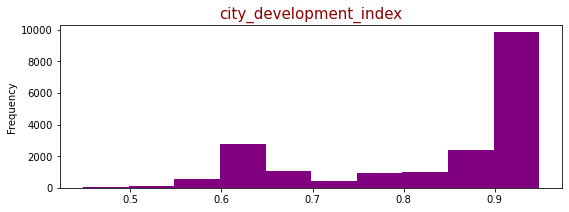

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64 

null value number -- > 0 



In [10]:
#city_development_index
plt.figure(figsize=(9,3))
plt.hist(train_data["city_development_index"], color="purple")
plt.ylabel("Frequency")
plt.title("city_development_index", color = "darkred",fontsize=15)
plt.show()

print("{} \n".format(train_data["city_development_index"].value_counts()))
print("null value number -- > {} \n".format(train_data["city_development_index"].isnull().sum()))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


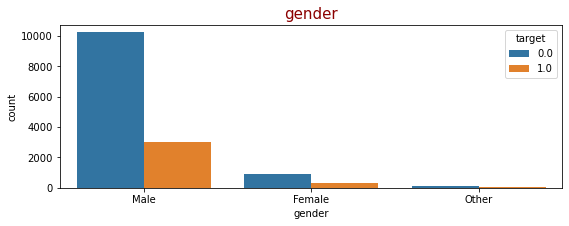

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
null value number -- > 4508 



In [11]:
#gender 
gender = train_data["gender"].value_counts()
plt.figure(figsize=(9,3))
sns.countplot(train_data["gender"], hue = "target", data = train_data)
plt.title("gender", color = "darkred",fontsize=15)
plt.show()
print(gender)
print("null value number -- > {} \n".format(train_data["gender"].isnull().sum()))

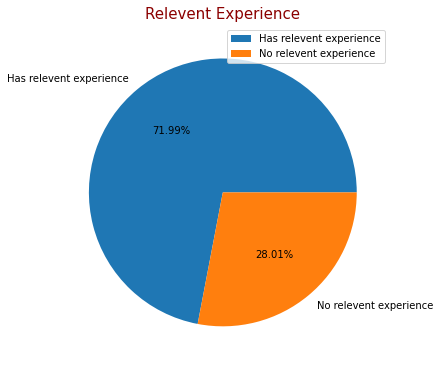

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
null value number -- > 0 



In [12]:
#relevent_experience
experience = train_data["relevent_experience"].value_counts()
data_index = experience.index
data_values = experience.values

plt.figure(figsize = (6,8))
plt.pie(data_values, labels=data_index, autopct='%1.2f%%')
plt.title('Relevent Experience',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

print(experience)
print("null value number -- > {} \n".format(train_data["relevent_experience"].isnull().sum()))

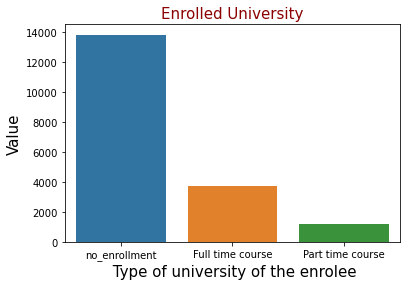

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
null value number -- > 386 



In [13]:
#enrolled_university 
university = train_data["enrolled_university"].value_counts()

ax= sns.barplot(x=university.index, y=university.values)
plt.xlabel(' Type of university of the enrolee', size = 15, color = "black") 
plt.ylabel('Value', size = 15) 
plt.title('Enrolled University', color = "darkred",fontsize=15)
plt.show()

print(university)
print("null value number -- > {} \n".format(train_data["enrolled_university"].isnull().sum()))

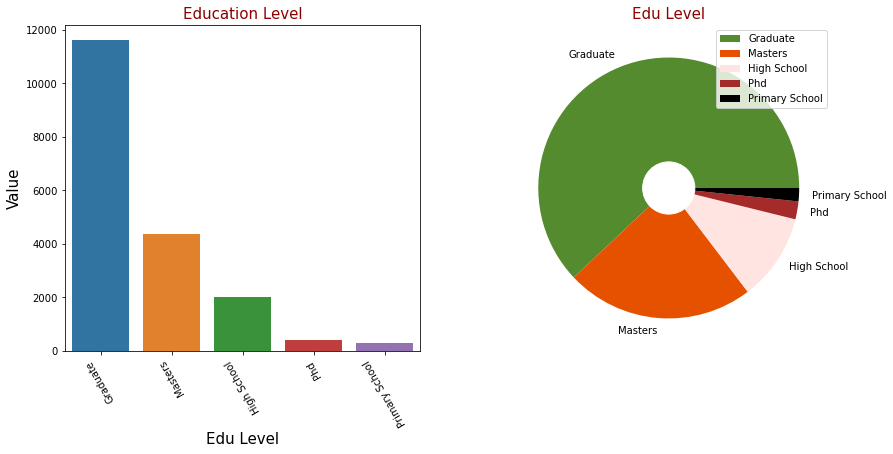

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
null value number -- > 460 



In [14]:
#education_level
colors = ['#558B2F','#E65100','#FFE4E1','#A52A2A','black']
edu_level = train_data["education_level"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax= sns.barplot(x=edu_level.index, y=edu_level.values)
plt.xlabel('Edu Level', size = 15, color = "black") 
plt.xticks(rotation = 120)
plt.ylabel('Value', size = 15) 
plt.title('Education Level', color = "darkred",fontsize=15)

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(edu_level.values, labels = edu_level.index, colors = colors)
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Edu Level",color="darkred",fontsize=15)
plt.legend()
plt.show()


print(edu_level)
print("null value number -- > {} \n".format(train_data["education_level"].isnull().sum()))


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


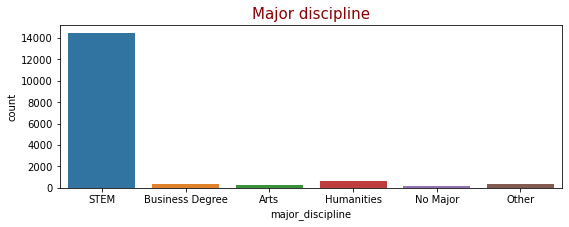

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
null value number -- > 2813 



In [15]:
# major_discipline
mj_discipline = train_data["major_discipline"].value_counts()

plt.figure(figsize=(9,3))
sns.countplot(train_data["major_discipline"])
plt.title("Major discipline", color = "darkred",fontsize=15)
plt.show()

print(mj_discipline)
print("null value number -- > {} \n".format(train_data["major_discipline"].isnull().sum()))


In [16]:
#experience 
print("{} \n".format(train_data["experience"].value_counts()))
print("null value number -- > {} \n".format(train_data["experience"].isnull().sum()))

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64 

null value number -- > 65 



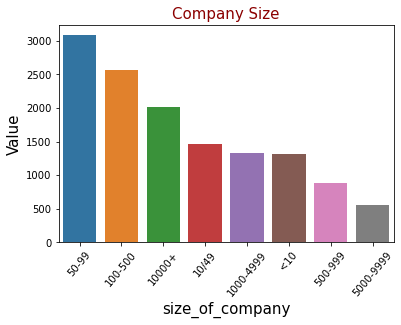

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64
null value number -- > 5938 



In [17]:
#company_size
company_size = train_data["company_size"].value_counts()

ax= sns.barplot(x=company_size.index, y=company_size.values)
plt.ylabel('Value', size = 15) 
plt.xticks(rotation = 50)
plt.xlabel('size_of_company',size=15)
plt.title('Company Size', color = "darkred",fontsize=15)
plt.show()

print(company_size)
print("null value number -- > {} \n".format(train_data["company_size"].isnull().sum()))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


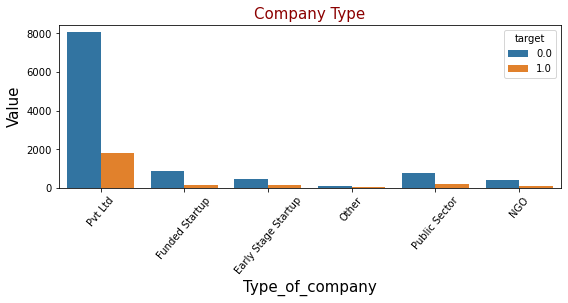

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
null value number -- > 6140 



In [18]:
#company_type
company_type = train_data["company_type"].value_counts()

plt.figure(figsize=(9,3))
sns.countplot(train_data["company_type"], hue = "target", data = train_data)
plt.xticks(rotation = 50)
plt.title("Company Type", color = "darkred", fontsize=15)
plt.xlabel('Type_of_company',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.show()

print(company_type)
print("null value number -- > {} \n".format(train_data["company_type"].isnull().sum()))


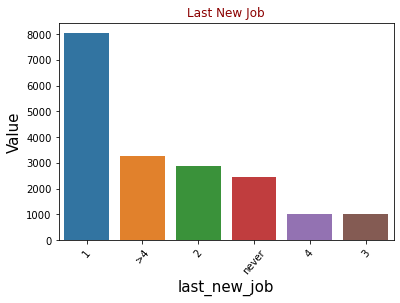

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64
null value number -- > 423 



In [19]:
# last_new_job 
last_new = train_data["last_new_job"].value_counts()

ax= sns.barplot(x=last_new.index, y=last_new.values)
plt.ylabel('Value', size = 15) 
plt.xticks(rotation = 50)
plt.title('Last New Job', color = "darkred")
plt.xlabel('last_new_job',fontsize=15,color="black")
plt.show()

print(last_new)
print("null value number -- > {} \n".format(train_data["last_new_job"].isnull().sum()))

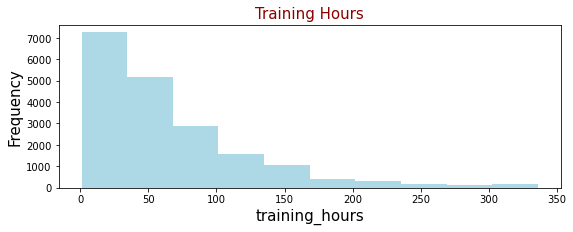

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
272      5
234      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64 

null value number -- > 0 



In [20]:
#training_hours 
plt.figure(figsize=(9,3))
plt.hist(train_data["training_hours"], color="lightblue")
plt.ylabel("Frequency",fontsize=15)
plt.xlabel("training_hours", fontsize=15)
plt.title('Training Hours',color="darkred",fontsize=15)
plt.show()

print("{} \n".format(train_data["training_hours"].value_counts()))
print("null value number -- > {} \n".format(train_data["training_hours"].isnull().sum()))

# BASIC DATA ANALYSIS

In [21]:
# last_new_job - target
train_data[["last_new_job","target"]].groupby(["last_new_job"], as_index = False).mean().sort_values(by = "target",ascending = False)

,last_new_job,target
5,never,0.301387
0,1,0.264303
1,2,0.241379
2,3,0.225586
3,4,0.221574
4,>4,0.182371


In [22]:
# company_type -target
train_data[["company_type","target"]].groupby(
    ["company_type"], as_index = False).mean().sort_values(by = "target",ascending = False)

,company_type,target
3,Other,0.239669
0,Early Stage Startup,0.235489
4,Public Sector,0.219895
2,NGO,0.186180
5,Pvt Ltd,0.180809
1,Funded Startup,0.139860


In [23]:
# gender -target
train_data[["gender","target"]].groupby(
    ["gender"], as_index = False).mean().sort_values(by = "target",ascending = False)

,gender,target
0,Female,0.263328
2,Other,0.261780
1,Male,0.227819


In [24]:
#relevent_experience -target
train_data[["relevent_experience","target"]].groupby(
    ["relevent_experience"], as_index = False).mean().sort_values(by = "target",ascending = False)

,relevent_experience,target
1,No relevent experience,0.338427
0,Has relevent experience,0.214690


In [25]:
#enrolled_university -target
train_data[["enrolled_university","target"]].groupby(
    ["enrolled_university"], as_index = False).mean().sort_values(by = "target",ascending = False)

,enrolled_university,target
0,Full time course,0.380889
1,Part time course,0.252087
2,no_enrollment,0.211406


In [26]:
#education_level -target
train_data[["education_level","target"]].groupby(
    ["education_level"], as_index = False).mean().sort_values(by = "target",ascending = False)

,education_level,target
0,Graduate,0.279790
2,Masters,0.214400
1,High School,0.195340
3,Phd,0.140097
4,Primary School,0.133117


In [27]:
#major_discipline
train_data[["major_discipline","target"]].groupby(
    ["major_discipline"], as_index = False).mean().sort_values(by = "target",ascending = False)

,major_discipline,target
4,Other,0.267717
1,Business Degree,0.262997
5,STEM,0.261593
3,No Major,0.246637
2,Humanities,0.210762
0,Arts,0.209486


In [28]:
train_data_len = len(train_data)
train_data = pd.concat([train_data,test_data],axis = 0).reset_index(drop = True)

In [29]:
train_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,enrollee_id
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,NaN
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,NaN
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,NaN
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,NaN
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,NaN


# MISSING VALUES

In [30]:
print(" \t Columns with null \n -->",train_data.columns[train_data.isnull().any()])

 	 Columns with null 
 --> Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job', 'target',
       'enrollee_id'],
      dtype='object')


In [31]:
print("\t how many nulls are there\n\n\n",train_data.isnull().sum())

	 how many nulls are there


 city                          0
city_development_index        0
gender                     5016
relevent_experience           0
enrolled_university         417
education_level             512
major_discipline           3125
experience                   70
company_size               6560
company_type               6774
last_new_job                463
training_hours                0
target                     2129
enrollee_id               19158
dtype: int64


In [724]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns


In [725]:
train_missing= missing_values_table(train_data)
train_missing

Your selected dataframe has 14 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
enrollee_id,19158,90.0
company_type,6774,31.8
company_size,6560,30.8
gender,5016,23.6
major_discipline,3125,14.7
target,2129,10.0
education_level,512,2.4
last_new_job,463,2.2
enrolled_university,417,2.0
experience,70,0.3


<AxesSubplot:>

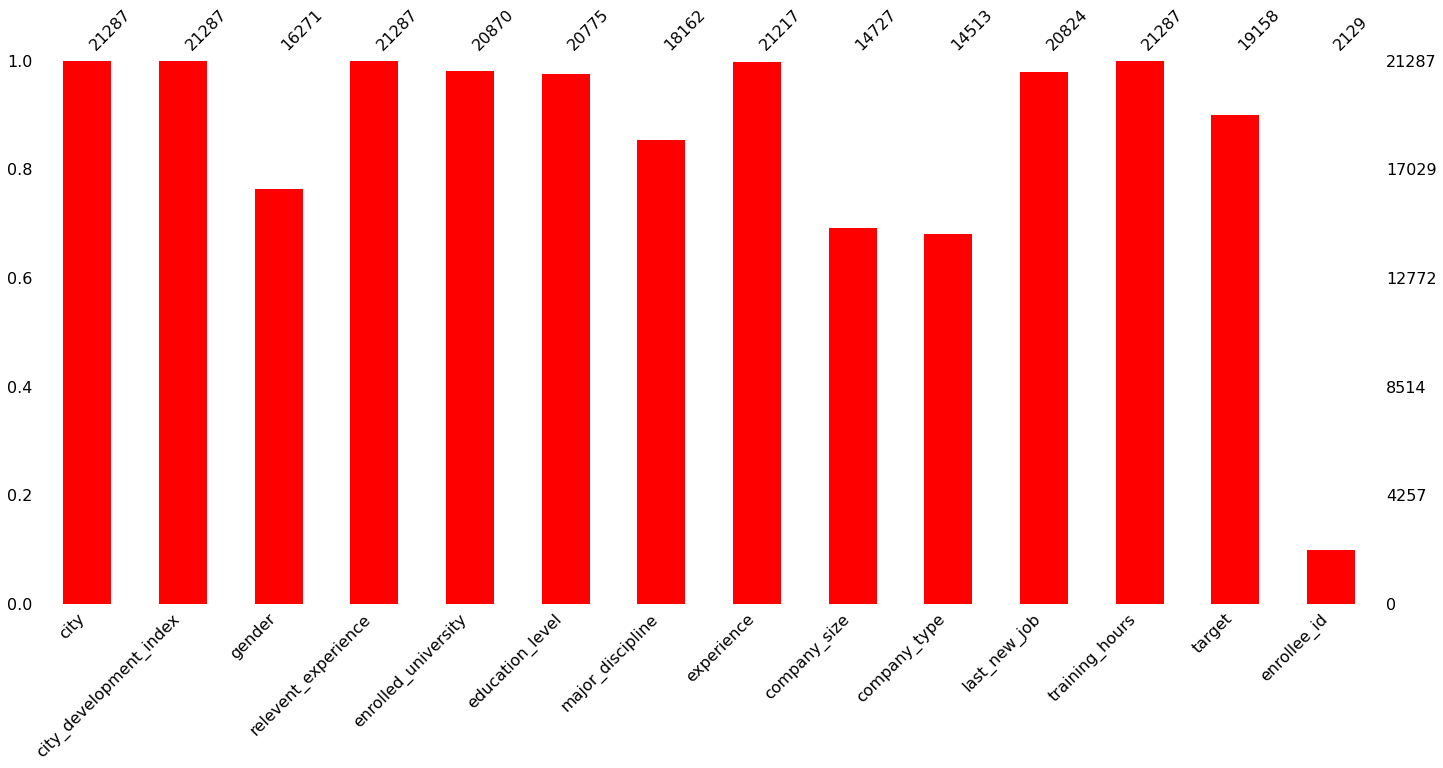

In [726]:
msno.bar(train_data, color = "red")

<AxesSubplot:>

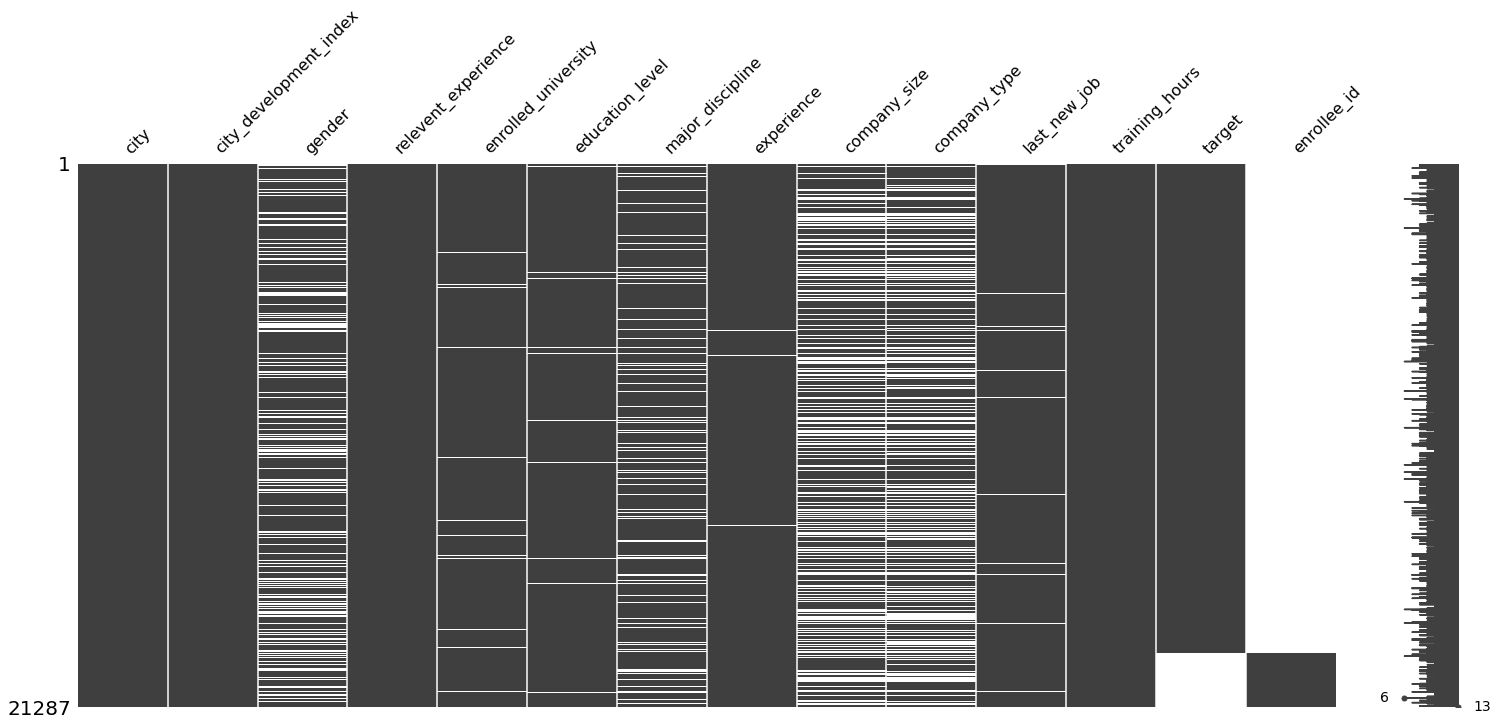

In [727]:
msno.matrix(train_data)

<AxesSubplot:>

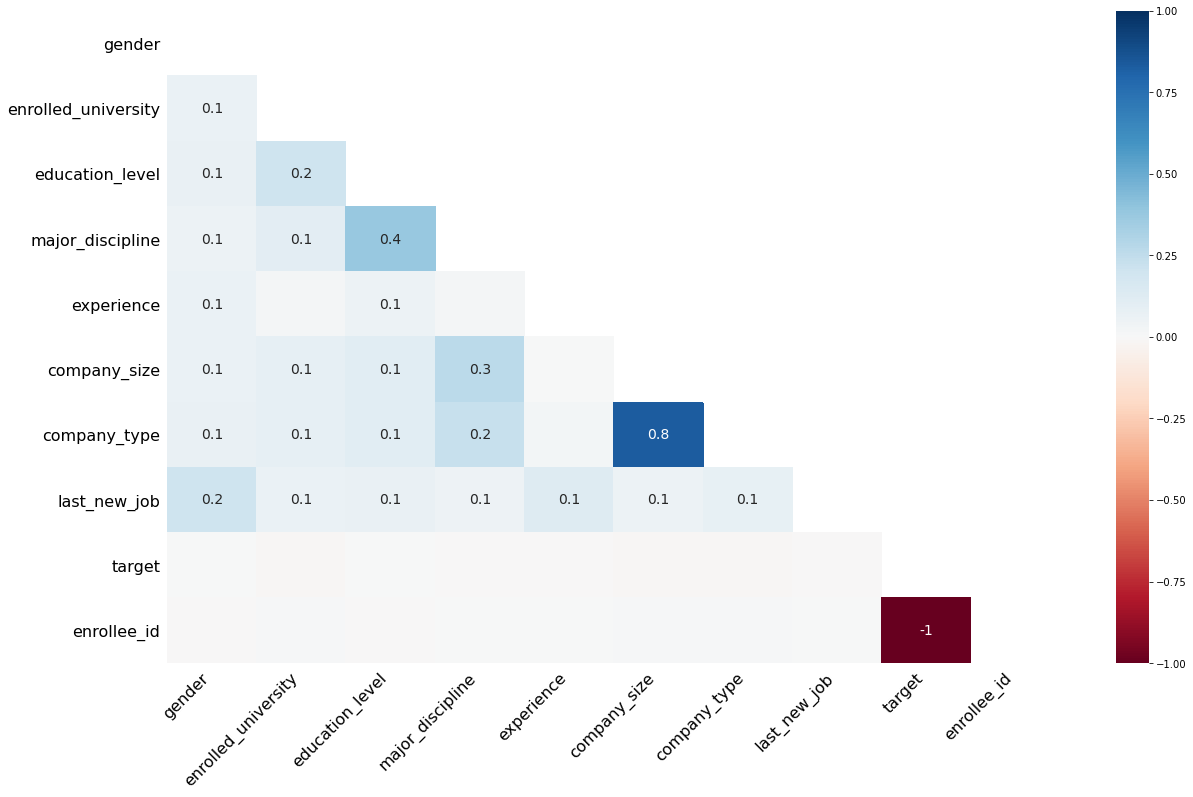

In [728]:
msno.heatmap(train_data)

<AxesSubplot:>

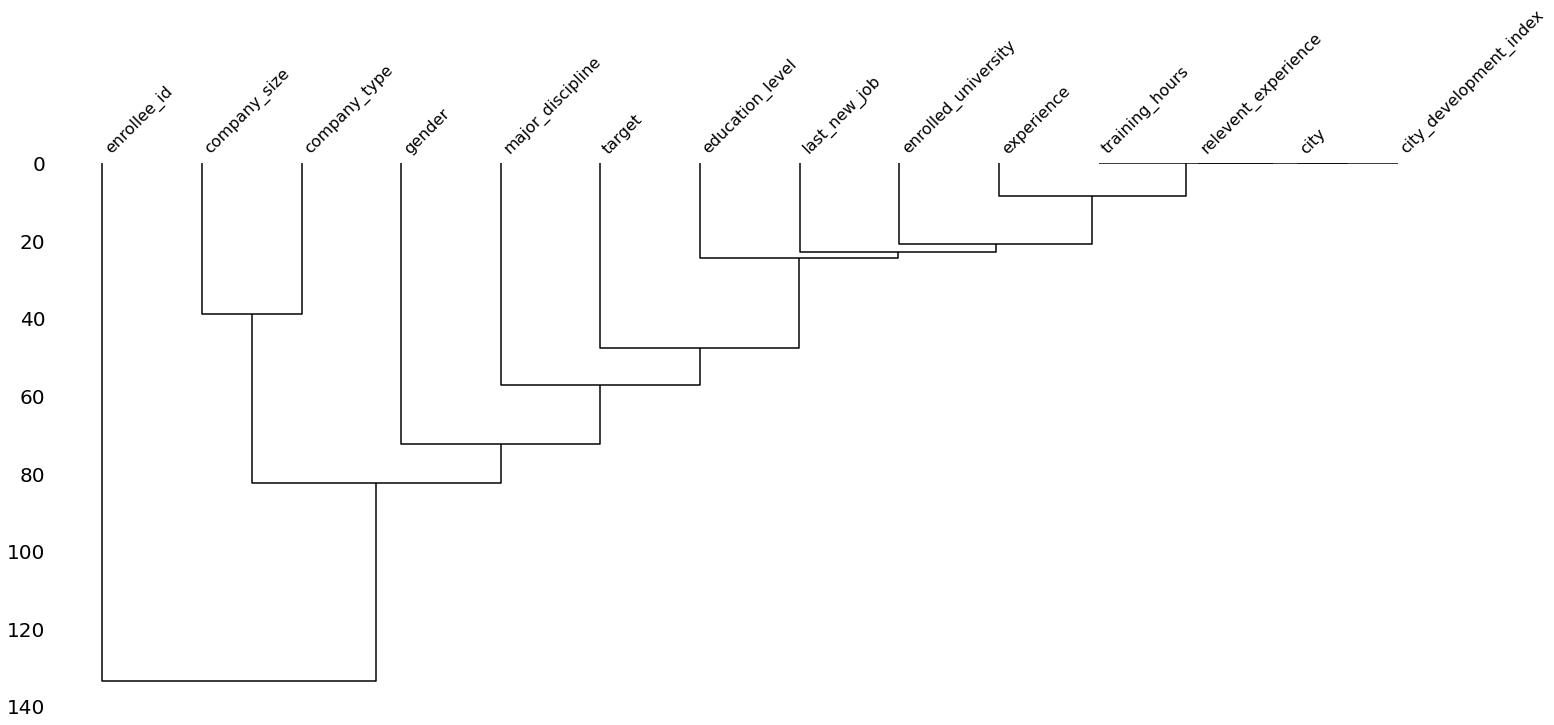

In [729]:
msno.dendrogram(train_data)

# DROPPING MISSING VALUES 

In [730]:
#DROPPING MISSING VALUES FROM THE COLUMNS- EXPERIENCE,ENROLLED_UNIVERSITY,LAST_NEW_JOB,EDUCATION_LEVEL
train_data.dropna(subset=["experience"], inplace=True)
train_data.dropna(subset=["enrolled_university"], inplace=True)
train_data.dropna(subset=["last_new_job"], inplace=True)
train_data.dropna(subset=["education_level"], inplace=True)

In [731]:
#AGAIN CHECKING THAT WHICH COLUMN HAS MISSING VALUES 
train_missing1= missing_values_table(train_data)
train_missing1

Your selected dataframe has 14 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
enrollee_id,18014,89.9
company_type,6055,30.2
company_size,5887,29.4
gender,4306,21.5
major_discipline,2471,12.3
target,2018,10.1


In [732]:
#CHECKING NULL VALUES FOR THE COLUMNS- EXPERIENCE,ENROLLED_UNIVERSITY,LAST_NEW_JOB,EDUCATION_LEVEL
print("NULL experience --> ",train_data["experience"].isnull().sum())
print("NULL enrolled_university --> ",train_data["enrolled_university"].isnull().sum())
print("NULL last_new_job --> ",train_data["last_new_job"].isnull().sum())
print("NULL education_level --> ",train_data["education_level"].isnull().sum())

NULL experience -->  0
NULL enrolled_university -->  0
NULL last_new_job -->  0
NULL education_level -->  0


In [733]:
#HANDLING THE CATEGORICAL MISSING VALUES

In [734]:
#FILLING REMAINING MISSING VALUE COLUMNS- MAJOR_DISCIPLINE,COMPANY_SIZE,COMPANY_TYPE,GENDER WITH THE FREQUENCY VALUE

In [735]:
#major_discipline
print("most repetitive --> ",train_data["major_discipline"].value_counts().index[0])
train_data["major_discipline"].fillna( method ='ffill', limit = 3, inplace = True)

most repetitive -->  STEM


In [736]:
train_data.dropna(subset=["major_discipline"], inplace=True)
print("NULL major_discipline --> ",train_data["major_discipline"].isnull().sum())

NULL major_discipline -->  0


In [737]:
#company_size
print("most repetitive --> ",train_data["company_size"].value_counts().index[0])
train_data["company_size"].fillna( method ='ffill', limit = 2, inplace = True)

most repetitive -->  50-99


In [738]:
train_data.dropna(subset=["company_size"], inplace=True)
print("NULL company_size --> ",train_data["company_size"].isnull().sum())


NULL company_size -->  0


In [739]:
#company_type
print("most repetitive --> ",train_data["company_type"].value_counts().index[0])
train_data["company_type"].fillna( method ='ffill', limit = 2, inplace = True)

most repetitive -->  Pvt Ltd


In [740]:
train_data.dropna(subset=["company_type"], inplace=True)
print("NULL company_type --> ",train_data["company_type"].isnull().sum())


NULL company_type -->  0


In [741]:
#gender
print("most repetitive --> ",train_data["gender"].value_counts().index[0])
train_data["gender"].fillna( method ='ffill', limit =2, inplace = True)


most repetitive -->  Male


In [742]:
train_data.dropna(subset=["gender"], inplace=True)
print("NULL gender --> ",train_data["gender"].isnull().sum())

NULL gender -->  0


In [743]:
train_data["gender"]

1          Male
2          Male
4          Male
5          Male
6          Male
          ...  
21279      Male
21280      Male
21281    Female
21285      Male
21286      Male
Name: gender, Length: 19178, dtype: object

In [744]:
train_data["gender"].value_counts()

Male      17266
Female     1678
Other       234
Name: gender, dtype: int64

# FEATURE ENGINEERING

In [745]:
#gender
# male = 0 , female = 1, other = 2
train_data["gender"] = [ 0 if i == "Female"
                        else 1 if i == "Male"
                        else 2 for i in train_data["gender"]]

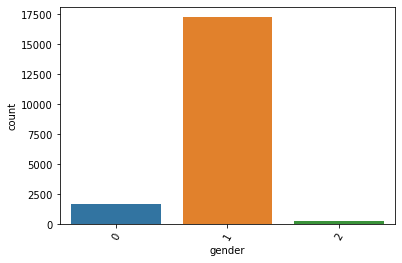

In [746]:
sns.countplot(x="gender", data = train_data)
plt.xticks(rotation = 60)
plt.show()

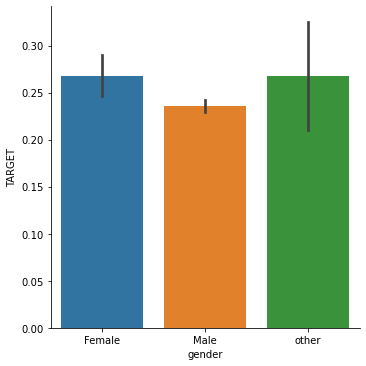

In [747]:
g = sns.catplot(x = "gender", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(["Female","Male","other"])
g.set_ylabels("TARGET")
plt.show()

In [748]:
#relevent_experience
# Has relevent experience = 0 , No relevent experience = 1
train_data["relevent_experience"] = [ 0 if i == "Has relevent experience"
                                    else 1 for i in train_data["relevent_experience"]]

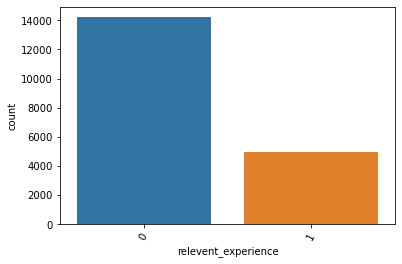

In [749]:
sns.countplot(x="relevent_experience", data = train_data)
plt.xticks(rotation = 60)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


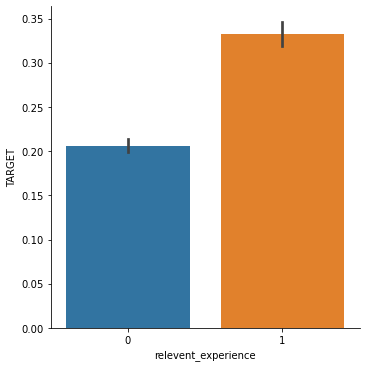

In [750]:
g = sns.factorplot(x = "relevent_experience", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [751]:
#enrolled_university 
# no_enrollment = 0 , Full time course = 1, Part time course = 2

train_data["enrolled_university"] = [ 0 if i == "no_enrollment"
                                    else 1 if i == "Full time course"
                                    else 2 for i in train_data["enrolled_university"]]

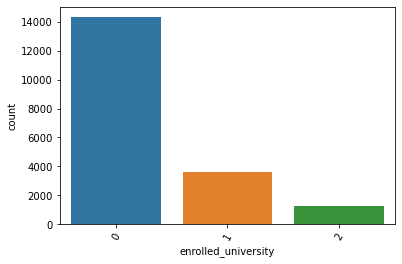

In [752]:
sns.countplot(x="enrolled_university", data = train_data)
plt.xticks(rotation = 60)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


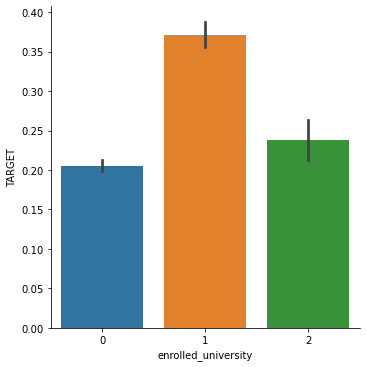

In [753]:
g = sns.factorplot(x = "enrolled_university", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [754]:
#education_level
# Graduate = 0 , Masters = 1, High School = 2, Phd = 3, Primary School = 4 

train_data["education_level"] = [ 0 if i == "Graduate"
                                    else 1 if i == "Masters"
                                    else 2 if i == "High School"
                                    else 3 if i == "Phd" 
                                    else 4 for i in train_data["education_level"]]

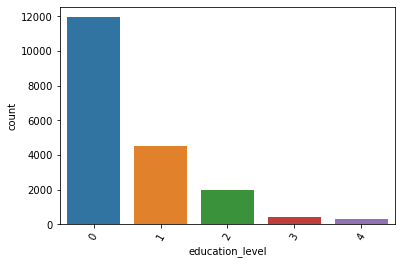

In [755]:
sns.countplot(x="education_level", data = train_data)
plt.xticks(rotation = 60)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


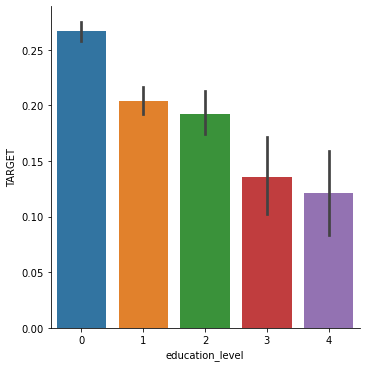

In [756]:
g = sns.factorplot(x = "education_level", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [757]:
#major_discipline 
# STEM  = 0 , Humanities = 1, Business Degree = 2, Arts = 3, No Major = 4, Other = 5 

train_data["major_discipline"] = [ 0 if i == "STEM"
                                    else 1 if i == "Humanities"
                                    else 2 if i == "Business Degree"
                                    else 3 if i == "Arts" 
                                    else 4 if i == "No Major" 
                                    else 5 for i in train_data["major_discipline"]]

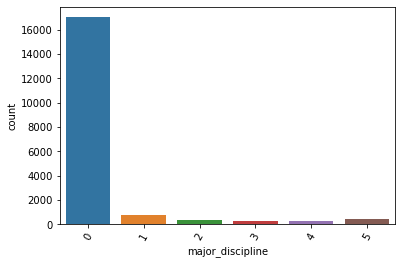

In [758]:
sns.countplot(x="major_discipline", data = train_data)
plt.xticks(rotation = 60)
plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


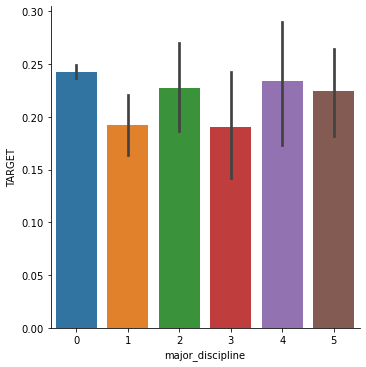

In [759]:
g = sns.factorplot(x = "major_discipline", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [760]:
#experience
train_data["experience"] = [ 0 if i == "2" or i == "1" or i == "4" or i == "<1" or i == "3"
                                    else 1 if i == "5>" or i == "11" or i == "7" or i == "10" or i == "6" or i == "9" or i == "8" or i == "20"
                                    else 2 for i in train_data["experience"]]

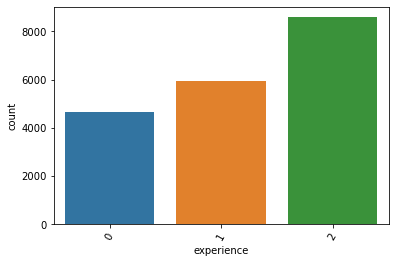

In [761]:
#experience
sns.countplot(x="experience", data = train_data)
plt.xticks(rotation = 60)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


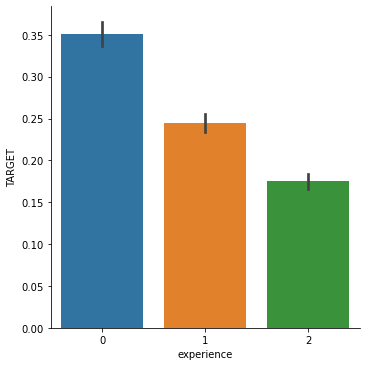

In [762]:
g = sns.factorplot(x = "experience", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [763]:
#company_size
train_data["company_size"] = [ 0 if i == "10/49"
                                    else 1 for i in train_data["company_size"]]

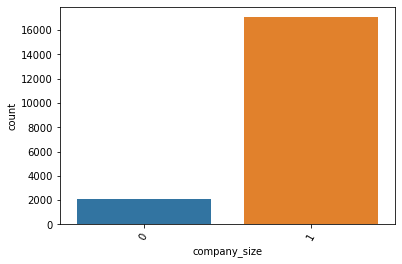

In [764]:
sns.countplot(x="company_size", data = train_data)
plt.xticks(rotation = 60)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


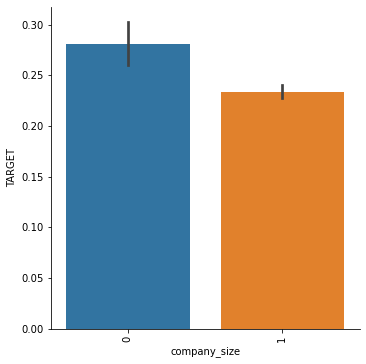

In [765]:
g = sns.factorplot(x = "company_size", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(rotation = 90)
g.set_ylabels("TARGET")
plt.show()

In [766]:
#company_type
# pvt ltd = 0, Funded Startup  = 1 , Public Sector  = 2, Early Stage Startup = 3, NGO = 4 , else 5 

train_data["company_type"] = [ 0 if i == "Pvt Ltd"
                               else 1 if i == "Funded Startup"
                               else 2 if i == "Public Sector"
                               else 3 if i == "Early Stage Startup"
                               else 4 if i == "NGO" 
                               else 5 for i in train_data["company_type"]]


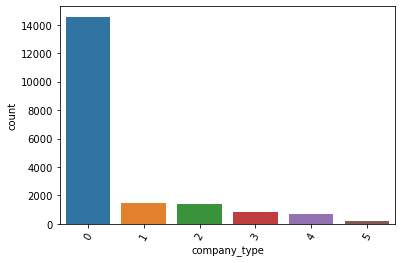

In [767]:
sns.countplot(x="company_type", data = train_data)
plt.xticks(rotation = 60)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


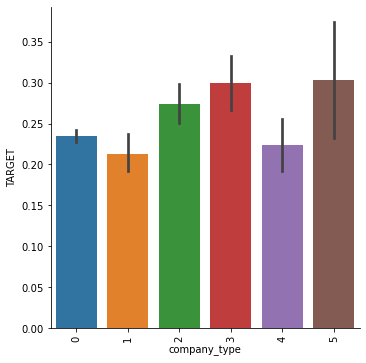

In [768]:
g = sns.factorplot(x = "company_type", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(rotation = 90)
g.set_ylabels("TARGET")
plt.show()


In [769]:
train_data["company_type"].value_counts()

0    14566
1     1469
2     1390
3      864
4      721
5      168
Name: company_type, dtype: int64

In [770]:
train_data["company_type"] = [ 0 if i == 3 or i == 4
                               else 1 if i == 2
                               else 2 for i in train_data["company_type"]]

In [771]:
#last_new_job
train_data["last_new_job"] = [ 0 if i == "1"
                               else 1 if i == "2"
                               else 2 if i == "3"
                               else 3 if i == "4"
                               else 4 if i == "never" 
                               else 5 for i in train_data["last_new_job"]]

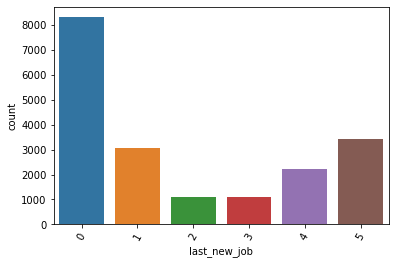

In [772]:
sns.countplot(x="last_new_job", data = train_data)
plt.xticks(rotation = 60)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


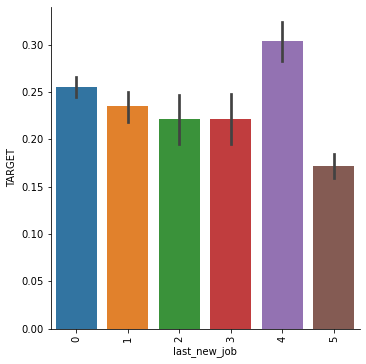

In [773]:
g = sns.factorplot(x = "last_new_job", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(rotation = 90)
g.set_ylabels("TARGET")
plt.show()


In [774]:
train_data["last_new_job"] = [ 0 if i == 4
                               else 1 if i == 5
                               else 2 for i in train_data["last_new_job"]]

In [775]:
train_data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,enrollee_id
1,city_40,0.776,1,1,0,0,0,2,1,2,1,47,0.0,NaN
2,city_21,0.624,1,1,1,0,0,2,1,2,0,83,0.0,NaN
4,city_162,0.767,1,0,0,1,0,2,1,2,2,8,0.0,NaN
5,city_176,0.764,1,0,2,0,0,1,1,2,2,24,1.0,NaN
6,city_160,0.920,1,0,0,2,0,2,1,2,2,24,0.0,NaN


In [776]:
#city
le = LabelEncoder()
train_data["city"] = le.fit_transform(train_data["city"])


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


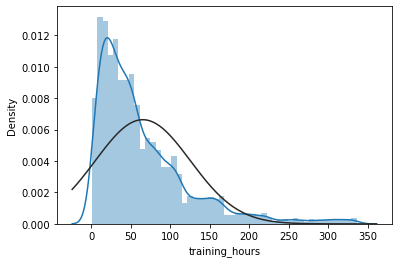

mu training_hours : 65.31629992699969, sigma training_hours : 60.1290749004222



In [777]:
# training_hours
sns.distplot(train_data["training_hours"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(train_data["training_hours"])
print("mu {} : {}, sigma {} : {}".format("training_hours", mu, "training_hours", sigma))
print()

In [778]:
train_data["training_hours"], lam = boxcox(train_data["training_hours"])


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


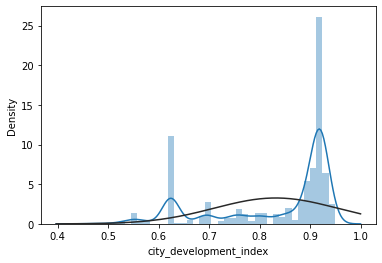

mu city_development_index : 0.8319748670351446, sigma city_development_index : 0.12204336633570376



In [779]:
# city_development_index
sns.distplot(train_data["city_development_index"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(train_data["city_development_index"])
print("mu {} : {}, sigma {} : {}".format("city_development_index", mu, "city_development_index", sigma))
print()

In [780]:
train_data["city_development_index"], lam = boxcox(train_data["city_development_index"])

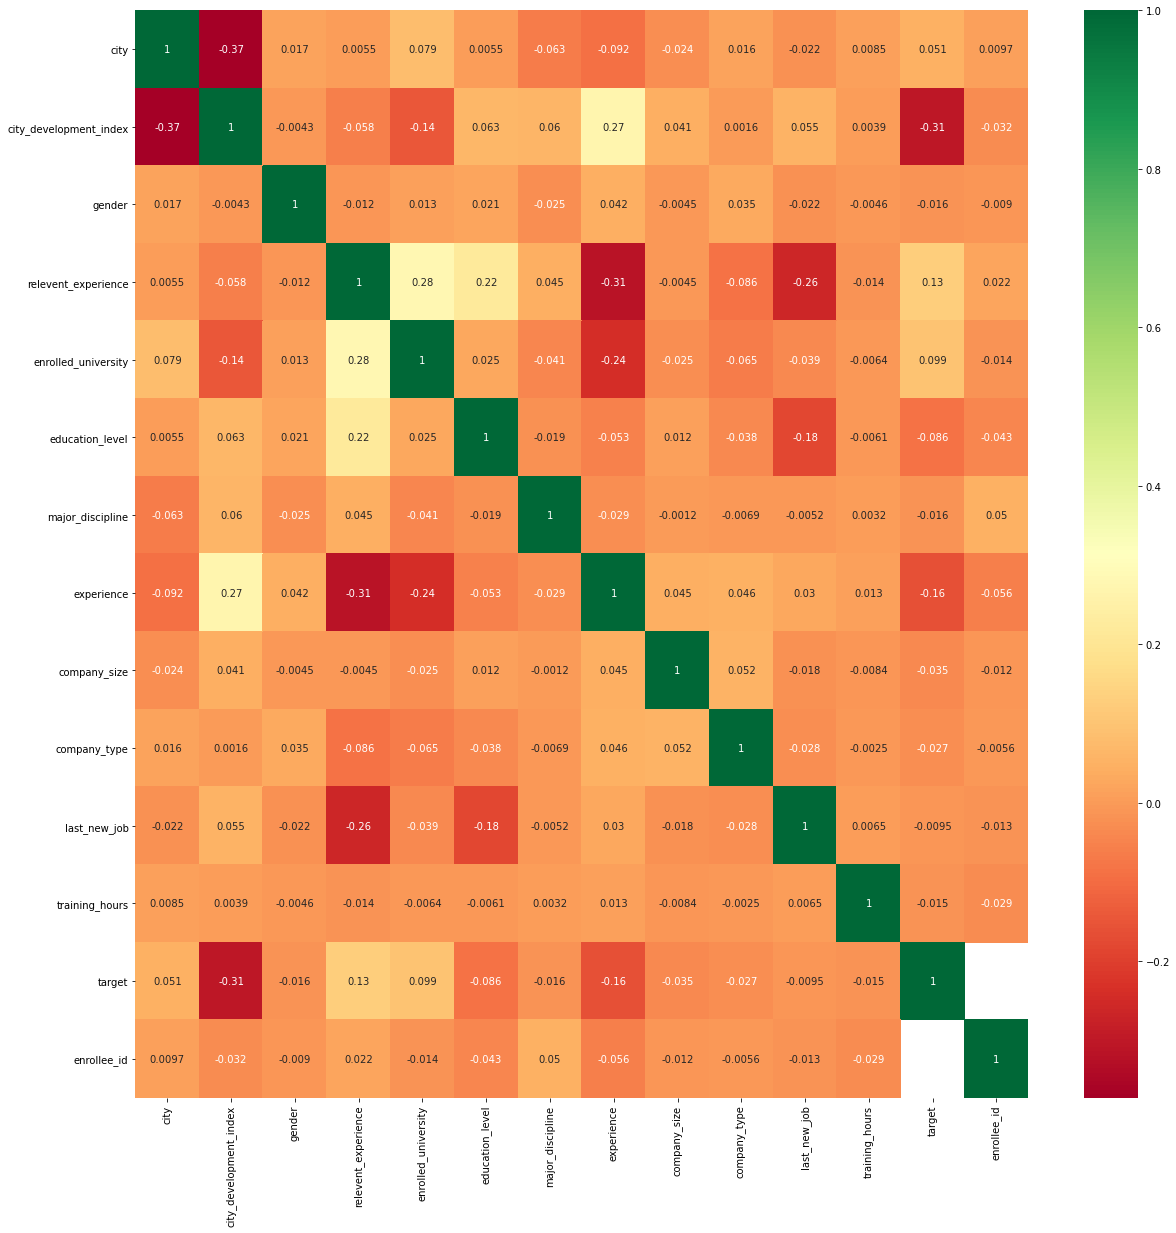

In [781]:
#get correlations of each features in dataset
corrmat=train_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [782]:
#The heatmap that city_development_index,education_level and experience have relatively high postive and negative relationship 
#with target. 
#So we will drop the features apart from this.
#Multicollineraity means that the independent variables need to be uncorrelated with each other. 
#We also need to check if these variables are related with eachother.

In [783]:
print(train_data[["city_development_index","education_level"]].corr())
print(train_data[["education_level","experience"]].corr())
print(train_data[["experience","city_development_index"]].corr())


                        city_development_index  education_level
city_development_index                1.000000         0.063239
education_level                       0.063239         1.000000
                 education_level  experience
education_level         1.000000   -0.053084
experience             -0.053084    1.000000
                        experience  city_development_index
experience                1.000000                0.266819
city_development_index    0.266819                1.000000


In [784]:
#city_development_index and experience has strong correlation between each other.
#multicollinearity is occured
#So remove the two variables before building the model

In [785]:
train_data=train_data.drop(["city_development_index","experience"],axis=1)

In [786]:
train_data.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,training_hours,target,enrollee_id
1,77,1,1,0,0,0,1,2,1,5.454301,0.0,NaN
2,64,1,1,1,0,0,1,2,0,6.610489,0.0,NaN
4,50,1,0,0,1,0,1,2,2,2.498590,0.0,NaN
5,57,1,0,2,0,0,1,2,2,4.225629,1.0,NaN
6,49,1,0,0,2,0,1,2,2,4.225629,0.0,NaN


# MODELLING

In [787]:
train_data = train_data.reset_index(drop=True)

In [788]:
test = train_data[17248:]
test.drop(labels = ["target","enrollee_id"],axis = 1, inplace = True)


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [789]:
test.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,training_hours
17248,78,1,0,1,0,0,1,2,2,3.997935
17249,5,0,0,0,0,0,1,2,2,6.970074
17250,64,1,1,0,2,0,1,2,0,3.446792
17251,26,1,0,0,1,0,0,2,2,5.098878
17252,5,1,0,0,0,0,1,2,1,6.310782


In [790]:
train = train_data[:17248]
train.drop(labels = ["enrollee_id"],axis = 1, inplace = True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [791]:
train.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,training_hours,target
0,77,1,1,0,0,0,1,2,1,5.454301,0.0
1,64,1,1,1,0,0,1,2,0,6.610489,0.0
2,50,1,0,0,1,0,1,2,2,2.498590,0.0
3,57,1,0,2,0,0,1,2,2,4.225629,1.0
4,49,1,0,0,2,0,1,2,2,4.225629,0.0


In [792]:
X = train.drop(labels = "target", axis = 1)
y = train["target"]

# " 📊 Train - Test Split "

In [793]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 13798
X_test 3450
y_train 13798
y_test 3450
test 1930


In [794]:
# model accuracy
result = []

In [795]:
" 1. XGBoost model "

' 1. XGBoost model '

In [796]:
XGB = XGBClassifier(max_depth = 1)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result.append(acc_xgb)
print("RESULT")
print("XGBoost Model Acc : ",acc_xgb)


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RESULT
XGBoost Model Acc :  0.7785507246376812


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

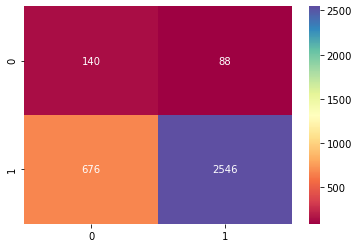

In [814]:
#Getting the true positives, false positives, 
#false negatives and true negatives
#and creating the matrix.
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
cm = [[tp,fp],[fn,tn]]

#Plot the matrix
g=sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral")
 
# labels, title and ticks
ax.set_xlabel('ACTUAL')
ax.set_ylabel('PREDICTED') 
ax.set_title('Logistic Regression Confusion Matrix')
#ax.xaxis.set_ticklabels(['0', '1'])
#ax.yaxis.set_ticklabels(['0', '1'])


In [817]:

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      2634
         1.0       0.61      0.17      0.27       816

    accuracy                           0.78      3450
   macro avg       0.70      0.57      0.57      3450
weighted avg       0.75      0.78      0.73      3450



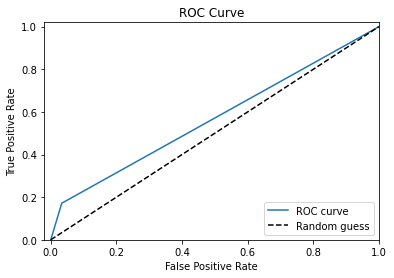

In [818]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")


In [ ]:
" 2. Random Forest Model "

In [531]:
random_forest_model = RandomForestClassifier(max_depth=7, random_state= 59)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)
print("RESULT")
print("Random Forest Model Acc : ",acc_random_forest)

RESULT
Random Forest Model Acc :  0.7794202898550725


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

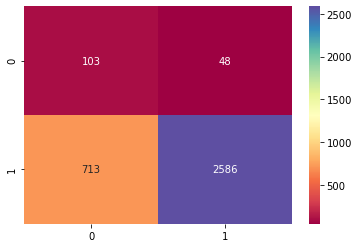

In [815]:
#Getting the true positives, false positives, 
#false negatives and true negatives
#and creating the matrix.
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_random_forest).ravel()
cm = [[tp,fp],[fn,tn]]

#Plot the matrix
g=sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral")
 
# labels, title and ticks
ax.set_xlabel('ACTUAL')
ax.set_ylabel('PREDICTED') 
ax.set_title('Logistic Regression Confusion Matrix')
#ax.xaxis.set_ticklabels(['0', '1'])
#ax.yaxis.set_ticklabels(['0', '1'])


In [820]:
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87      2634
         1.0       0.68      0.13      0.21       816

    accuracy                           0.78      3450
   macro avg       0.73      0.55      0.54      3450
weighted avg       0.76      0.78      0.72      3450



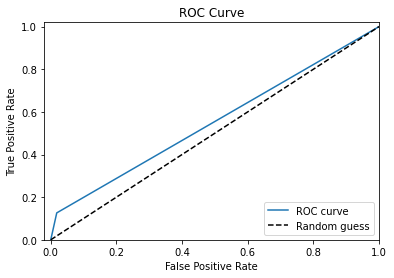

In [821]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_random_forest)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")


In [532]:
" 3. KNN Model "

' 3. KNN Model '

In [533]:
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=knn_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_knn = clf.predict(X_test)
cm_random_knn = confusion_matrix(y_pred_knn, y_test)
acc_random_knn = accuracy_score(y_test, y_pred_knn)
result.append(acc_random_knn)
print("RESULT")
print("KNN Model Acc : ",acc_random_knn)


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   53.5s finished


RESULT
KNN Model Acc :  0.7892753623188405


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

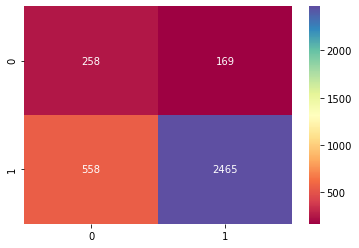

In [816]:
#Getting the true positives, false positives, 
#false negatives and true negatives
#and creating the matrix.
cm_random_knn = confusion_matrix(y_pred_knn, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
cm = [[tp,fp],[fn,tn]]

#Plot the matrix
g=sns.heatmap(cm, annot=True, fmt = "d", cmap="Spectral")
 
# labels, title and ticks
ax.set_xlabel('ACTUAL')
ax.set_ylabel('PREDICTED') 
ax.set_title('Logistic Regression Confusion Matrix')
#ax.xaxis.set_ticklabels(['0', '1'])
#ax.yaxis.set_ticklabels(['0', '1'])

In [819]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87      2634
         1.0       0.60      0.32      0.42       816

    accuracy                           0.79      3450
   macro avg       0.71      0.63      0.64      3450
weighted avg       0.77      0.79      0.76      3450



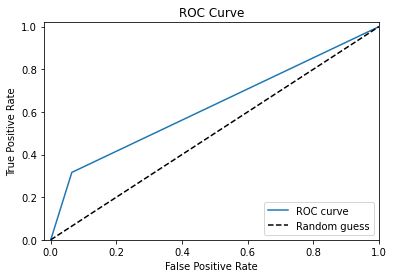

In [822]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")


In [534]:
results = pd.DataFrame({"Model Result":result, 
                        "Models":["XGBoost",
                                  "RandomForest",
                                  "KNN"]})


In [535]:
results

,Model Result,Models
0,0.778551,XGBoost
1,0.779420,RandomForest
2,0.789275,KNN


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


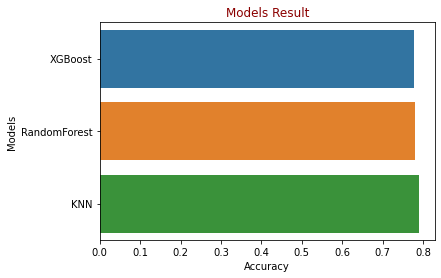

In [536]:
g = sns.barplot("Model Result", "Models", data = results)
g.set_xlabel("Accuracy")
g.set_title("Models Result", color = "darkred")
plt.show()
